In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%pylab inline
import datetime
import dateutil.relativedelta

Populating the interactive namespace from numpy and matplotlib


In [133]:
#MACD
MACD_1 = pd.read_excel('MACD_1_125.xlsx')
MACD_2 = pd.read_excel('MACD_126_500.xlsx')
MACD = pd.concat([MACD_1,MACD_2])
MACD.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)
MACD['Year'] = MACD['DataDate'].dt.year
MACD['Month'] = MACD['DataDate'].dt.month
MACD['Day'] = MACD['DataDate'].dt.day

New = MACD.groupby(['Year', 'Month', 'label'])['Day'].apply(lambda x: x.max())
New = pd.DataFrame(New)
new = New.reset_index()

MACD_test = pd.merge(new, MACD, on = ['Year', 'Month', 'Day', 'label' ], how = 'left')
MACD_test = MACD_test.drop(columns = 'Day')

# MACD_test['DataDate'] = MACD_test['DataDate'] + pd.offsets.MonthEnd(1)
# MACD_test = MACD_test.loc[:, ['DataDate', 'label' , 'close_hist_4_36','close_hist_8_36', 
#                             'close_hist_12_36', 'close_hist_4_24', 'close_hist_8_24', 'close_hist_12_24']]

In [141]:
#OBV
OBV_1 = pd.read_excel('vol_ind_1_345.xlsx')
OBV_2 = pd.read_excel('vol_ind_345_500.xlsx')
OBV = pd.concat([OBV_1,OBV_2])
OBV.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)
OBV['Year'] = OBV['DataDate'].dt.year
OBV['Month'] = OBV['DataDate'].dt.month
OBV['Day'] = OBV['DataDate'].dt.day

New = OBV.groupby(['Year', 'Month', 'label'])['Day'].apply(lambda x: x.max())
New = pd.DataFrame(New)
new = New.reset_index()
OBV_test = pd.merge(new, OBV, on = ['Year', 'Month', 'Day', 'label' ], how = 'left')
OBV_test = OBV_test.drop(columns = 'Day')
#OBV_test['DataDate'] = OBV_test['DataDate'] + pd.offsets.MonthEnd(1)
#OBV_test = OBV_test.loc[:, ['DataDate', 'label' , 'obv_hist_4_36','obv_hist_8_36', 
#                             'obv_hist_12_36', 'obv_hist_4_24', 'obv_hist_8_24', 'obv_hist_12_24']]

In [142]:
#MOM_6
MOM_6 = pd.read_excel('MOM_6.xlsx')
MOM_6.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)
MOM_6['Year'] = MOM_6['DataDate'].dt.year
MOM_6['Month'] = MOM_6['DataDate'].dt.month
MOM_6['Day'] = MOM_6['DataDate'].dt.day
New = MOM_6.groupby(['Year', 'Month', 'label'])['Day'].apply(lambda x: x.max())
New = pd.DataFrame(New)
new = New.reset_index()
MOM_6_test = pd.merge(new, MOM_6, on = ['Year', 'Month', 'Day', 'label' ], how = 'left')
MOM_6_test = MOM_6_test.drop(columns = 'Day')
#MOM_6_test['DataDate'] = MOM_6_test['DataDate'] + pd.offsets.MonthEnd(1)
#MOM_6_test = MOM_6_test.loc[:, ['DataDate', 'label' , 'mom_6']]

In [143]:
#MOM_12
MOM_12 = pd.read_excel('MOM_12.xlsx')
MOM_12.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)
MOM_12['Year'] = MOM_12['DataDate'].dt.year
MOM_12['Month'] = MOM_12['DataDate'].dt.month
MOM_12['Day'] = MOM_12['DataDate'].dt.day

New = MOM_12.groupby(['Year', 'Month', 'label'])['Day'].apply(lambda x: x.max())
New = pd.DataFrame(New)
new = New.reset_index()
MOM_12_test = pd.merge(new, MOM_12, on = ['Year', 'Month', 'Day', 'label' ], how = 'left')
MOM_12_test = MOM_12_test.drop(columns = 'Day')
#MOM_12_test['DataDate'] = MOM_12_test['DataDate'] + pd.offsets.MonthEnd(1)
#MOM_12_test = MOM_12_test.loc[:, ['DataDate', 'label' , 'mom_12']]

In [ ]:
OBV_test = OBV_test[OBV_test.label != 'BRK']
MACD_test = MACD_test[MACD_test.label != 'BRK']
MOM_6 = MOM_6[MOM_6.label != 'BRK']
MOM_12 = MOM_12[MOM_12.label != 'BRK']
company = company[company.label != 'ARNC']

In [150]:
MACD_test.columns = ['Year', 'Month', 'label', 'DataDate', 'MACD_1_12', 'MACD_2_12', 'MACD_3_12',
                     'MACD_1_9', 'MACD_2_9', 'MACD_3_9']

In [154]:
OBV_test.columns = ['Year', 'Month', 'label', 'DataDate','VOL_1_12', 'VOL_2_12', 'VOL_3_12',
                    'VOL_1_9', 'VOL_2_9', 'VOL_3_9']

In [197]:
MOM_12_test = MOM_12_test[['Year', 'Month', 'label', 'mom_12']]
MOM_6_test = MOM_6_test[['Year', 'Month', 'label', 'mom_6']]
MACD_test = MACD_test[['Year', 'Month', 'label', 'MACD_1_12', 'MACD_2_12','MACD_3_12', 'MACD_1_9', 'MACD_2_9', 'MACD_3_9']]
OBV_test = OBV_test[['Year', 'Month', 'label','VOL_1_12', 'VOL_2_12', 'VOL_3_12','VOL_1_9', 'VOL_2_9', 'VOL_3_9']]

In [198]:
# Подгружаем компании
company = pd.read_excel('features_zero.xlsx') 
company = company.iloc[:-1, 1:4]
company['DataDate'] = pd.DatetimeIndex(company['DataDate'])
company = company[company.DataDate.dt.year != 2000]

In [199]:
company['Year'] = company['DataDate'].dt.year
company['Month'] = company['DataDate'].dt.month

In [200]:
company.shape

(6502, 5)

In [201]:
# Merge MACD
company = pd.merge(company, MACD_test, on = ['Year', 'Month', 'label'], how = 'left' )
company.drop_duplicates(inplace = True)

In [202]:
# Merge OBV
company = pd.merge(company, OBV_test, on = ['Year', 'Month', 'label'], how = 'left' )
company.drop_duplicates(inplace = True)


In [203]:
# Merge MOM_6
company = pd.merge(company, MOM_6_test, on = ['Year', 'Month', 'label'], how = 'left' )
company.drop_duplicates(inplace = True)


In [204]:
# Merge MOM_12
company = pd.merge(company, MOM_12_test, on =['Year', 'Month', 'label'], how = 'left' )
company.drop_duplicates(inplace = True)


In [205]:
company.shape

(6502, 19)

In [208]:
srv = pd.read_excel('srv.xlsx')
srv = srv.iloc[:, 1:]
srv.rename(columns = {'year':'Year'}, inplace = True)

In [209]:
company = pd.merge(company, srv, how = 'left', on = ['Year', 'label'])
company.rename(columns = {'ret':'srv'}, inplace = True)


In [212]:
company.dropna(inplace = True)

In [129]:
company.describe().T.to_excel('describe_table.xlsx')

In [225]:
company.shape

(5832, 18)

In [216]:
company.drop(columns = ['Year', 'Month'], inplace = True)

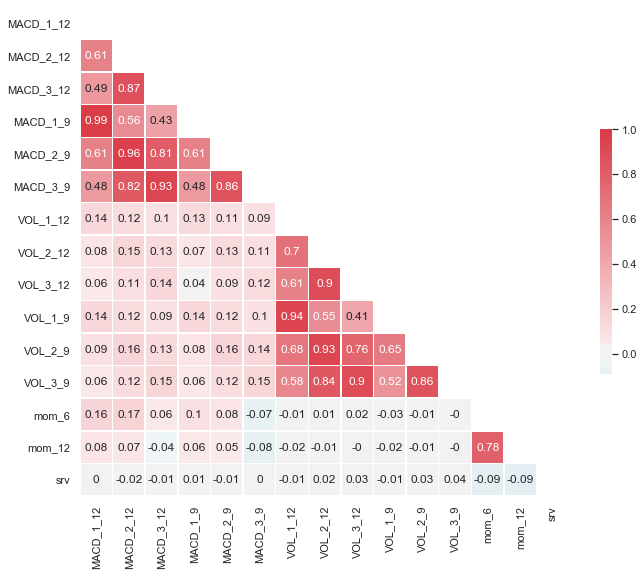

In [217]:
%config InlineBackend.figure_format = 'png' 
sns.set(style="white")

# Compute the correlation matrix
corr = round(company.corr(),2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [235]:
# Пойдет утечка, добавит процетов в AUC-ROC в тесте

PCA_ind = company.iloc[:, 3:]

from sklearn.preprocessing import StandardScaler

PCA_ind = StandardScaler().fit_transform(PCA_ind)


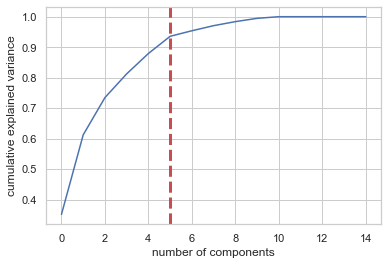

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.351232,0.351232
1,0.612247,0.261015
2,0.734531,0.122284
3,0.812404,0.077873
4,0.879326,0.066923
5,0.935699,0.056373
6,0.953887,0.018188
7,0.970584,0.016697
8,0.983815,0.013231
9,0.994621,0.010805


In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components = PCA_ind.shape[1])
pca_test.fit(PCA_ind)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=3, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))


In [237]:
pca = PCA(n_components = 5)
pca.fit(PCA_ind)
PCA_ind = pca.transform(PCA_ind)
PCA_ind = pd.DataFrame(PCA_ind, columns = ['tech_PCA_1', 'tech_PCA_2', 'tech_PCA_3', 'tech_PCA_4', 'tech_PCA_5'])

In [238]:
PCA_ind

,tech_PCA_1,tech_PCA_2,tech_PCA_3,tech_PCA_4,tech_PCA_5
0,0.063051,-0.028081,1.006695,-0.248183,1.655906
1,-0.234830,0.132967,0.064717,-0.108854,-1.245992
2,2.825728,-2.374857,-4.766763,-2.042551,3.781779
3,1.126917,-0.460640,-0.119725,0.250979,0.908273
4,0.266795,-0.378805,-0.199485,0.291915,-0.415649
...,...,...,...,...,...
5827,0.984255,-0.394989,-0.072816,-0.635463,-1.015345
5828,-1.243663,0.937537,0.781771,-1.200956,-0.910406
5829,-0.197684,-0.040773,-0.466562,0.616326,-0.356516
5830,-1.159042,0.589268,0.619127,-0.583045,-0.695238


In [239]:
company.reset_index(drop = True, inplace = True)

In [240]:
PCA_ind = pd.concat([company.iloc[:, :3], PCA_ind], axis = 1)

In [241]:
PCA_ind

,DataDate,company,label,tech_PCA_1,tech_PCA_2,tech_PCA_3,tech_PCA_4,tech_PCA_5
0,2001-06-30,H&R Block Inc.,HRB,0.063051,-0.028081,1.006695,-0.248183,1.655906
1,2001-06-30,J.M. Smucker Company,SJM,-0.234830,0.132967,0.064717,-0.108854,-1.245992
2,2001-06-30,NetApp Inc.,NTAP,2.825728,-2.374857,-4.766763,-2.042551,3.781779
3,2001-07-31,Cintas Corporation,CTAS,1.126917,-0.460640,-0.119725,0.250979,0.908273
4,2001-07-31,FedEx Corporation,FDX,0.266795,-0.378805,-0.199485,0.291915,-0.415649
...,...,...,...,...,...,...,...,...
5827,2017-12-31,Hormel Foods Corporation,HRL,0.984255,-0.394989,-0.072816,-0.635463,-1.015345
5828,2017-12-31,Synopsys Inc.,SNPS,-1.243663,0.937537,0.781771,-1.200956,-0.910406
5829,2017-12-31,Hewlett Packard Enterprise Co.,HPE,-0.197684,-0.040773,-0.466562,0.616326,-0.356516
5830,2017-12-31,Agilent Technologies Inc.,A,-1.159042,0.589268,0.619127,-0.583045,-0.695238


In [242]:
PCA_ind.to_excel('PCA_tech.xlsx')